In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

In [186]:
## import file
frame = pd.read_excel(r'D:\FaceRecog\face_data\Mmatrix_val.xlsx',index_col =0)
frame.columns=frame.columns

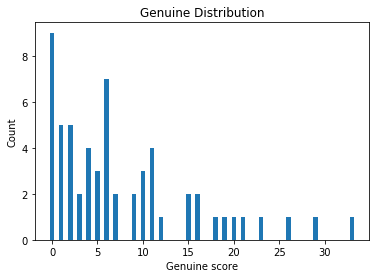

In [187]:
# Genuine Distribution

m=[round(frame[a][b]) for a in frame.columns for b in frame .index if a==b ]
n=[round(frame[a][b]) for a in frame.columns for b in frame .index if a!=b ]
from collections import Counter
xa=Counter(m)
ya=Counter(n)
x1=[i[0] for i in xa.items()]
y1=[i[1] for i in xa.items()]

plt.bar(x1,y1,width=0.5)
plt.xlabel("Genuine score")
plt.ylabel("Count")
plt.title("Genuine Distribution")
plt.show()


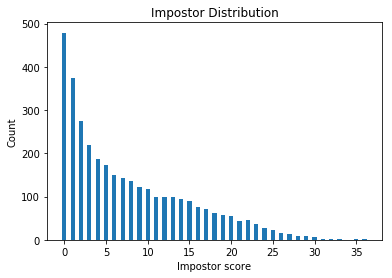

In [188]:
# Imposter Distribution
m=[round(frame[a][b]) for a in frame.columns for b in frame .index if a==b ]
n=[round(frame[a][b]) for a in frame.columns for b in frame .index if a!=b ]
from collections import Counter
xa=Counter(m)
ya=Counter(n)
x2=[i[0] for i in ya.items()]
y2=[i[1] for i in ya.items()]
plt.bar(x2,y2,width=0.5)
plt.xlabel("Impostor score")
plt.ylabel("Count")
plt.title("Impostor Distribution")
plt.show()



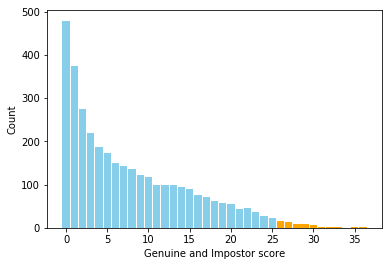

In [189]:
#Genuine and Imposter Distribution
color1 = ['orange' if i[0]>25 else 'skyblue' for i in xa.items() if py.isnan(i[0])==False]
color2 = ['orange' if i[0]>25 else 'skyblue' for i in ya.items() if py.isnan(i[0])==False]
plt.bar(x1,y1,width=0.5,color=color1)
plt.bar(x2,y2,width=0.9,color=color2)
plt.xlabel("Genuine and Impostor score")
plt.ylabel("Count")
plt.show()

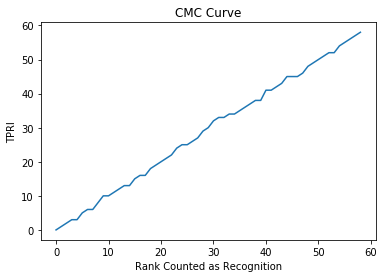

In [194]:
## plot CMC graphs

ads=[a for a in frame.columns for b in frame .index if a==b]
re={i:0 for i in range(59)}
for ad in ads:
    row=[a for a in frame[:][ad]]
    row=sorted(row)
    for i in range(59):
        if frame[ad][ad] in row[:i]:
            re[i]=re.get(i,0)+1
            
x=list(re.keys())
y=list(re.values())
plt.plot(x,y)
plt.xlabel("Rank Counted as Recognition")
plt.ylabel("TPRI")
plt.title("CMC Curve")
plt.show()




In [191]:
def tmr(a,th):
    count=0
    for i in a:
        if i>=th:
            count +=1
    return count/(len(a)*1.0)
        
    

In [192]:
def fmr(b,th):
    count=0
    for i in b:
        if i>=th:
            count +=1
    return count/(len(b)*1.0)

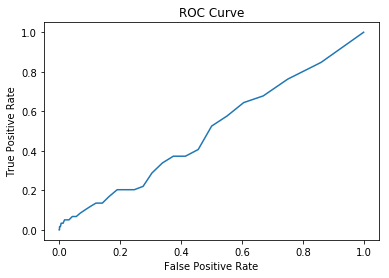

In [193]:
# plot ROC Curve

re_a = [tmr(m,i) for i in py.arange(0,100,1)]
re_b=[fmr(n,i) for i in py.arange(0,100,1)]
plt.plot(re_b,re_a)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()